In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import log_loss, precision_score, accuracy_score, confusion_matrix, mean_squared_error  # evaluation metrics

from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Reading and processing of data points
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.drop(columns=['id', 'gender', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level'], inplace=True)

df = df.replace(to_replace="smokes",value=1)
df = df.replace(to_replace="never smoked",value=0)
df = df.replace(to_replace="formerly smoked",value=np.nan)
df = df.replace(to_replace="Unknown",value=np.nan)
df = df.dropna(axis = 0) # drop rows with empty values
df

,age,hypertension,heart_disease,bmi,smoking_status,stroke
2,80.0,0,1,32.5,0.0,1
3,49.0,0,0,34.4,1.0,1
4,79.0,1,0,24.0,0.0,1
6,74.0,1,1,27.4,0.0,1
7,69.0,0,0,22.8,0.0,1
...,...,...,...,...,...,...
5096,57.0,0,0,28.2,0.0,0
5100,82.0,1,0,28.3,0.0,0
5102,57.0,0,0,21.7,0.0,0
5106,81.0,0,0,40.0,0.0,0


/opt/software/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

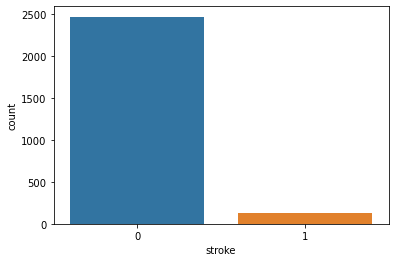

In [3]:
# Visualizations of some attributes
sns.countplot(df['stroke'])

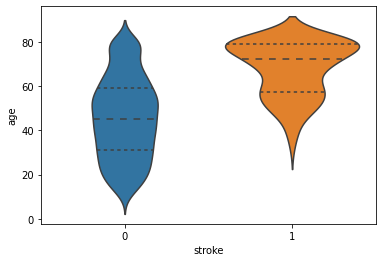

In [4]:
sns.violinplot(y='age', x='stroke', data=df, inner='quartile')
plt.show()

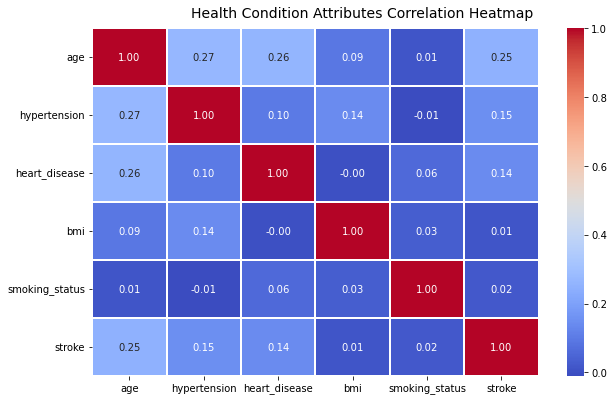

In [5]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Health Condition Attributes Correlation Heatmap', fontsize=14)

In [6]:
# Selecting features and labels
features = df[['age','hypertension','heart_disease','bmi','smoking_status','stroke']].to_numpy() # shape (2589,6)
labels = df['stroke'].to_numpy() # shape (2589,)

In [7]:
# Splitting data into training set, validation set and testing set
X_train, X_rem, y_train, y_rem = train_test_split(features, labels, test_size = 0.30, random_state=43)
X_test, X_val, y_test, y_val = train_test_split(X_rem, y_rem,test_size = 0.15, random_state=43)


In [8]:
# Method 1: Logistic Regression
clf_1 = LogisticRegression()
clf_1.fit(X_train,y_train)

# compute predicted labels for training and validation set
y_pred_train_log = clf_1.predict(X_train) 
y_pred_val_log = clf_1.predict(X_val)

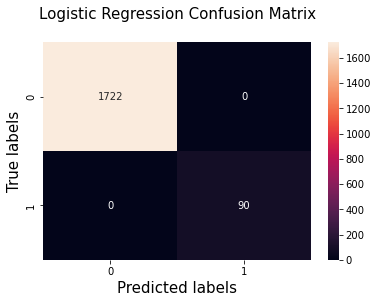

In [9]:
# confusion matrix
confmat_log = confusion_matrix(y_train, y_pred_train_log)

# plot the confusion matrix
ax = plt.subplot()
sns.heatmap(confmat_log,annot=True, fmt='g', ax=ax)
ax.set_title('Logistic Regression Confusion Matrix\n',fontsize=15)
ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
plt.show()

In [10]:
# Logistic loss for training and validation data
loss_train = log_loss(y_train, y_pred_train_log)
loss_val = log_loss(y_val, y_pred_val_log)
print(loss_train)
print(loss_val)

9.992007221626413e-16
9.992007221626413e-16


In [11]:
# Method 2: Multilayer perceptron (MLP)
mlp_regr = MLPRegressor(activation = 'logistic', random_state=42, max_iter=1000) # Sigmoid function (logistic) used as activation function
mlp_regr.fit(X_train,y_train)    # Train MLP on the training set

## evaluate the trained MLP on both training set and validation set
y_pred_train_mlp = mlp_regr.predict(X_train)    # predict on the training set
y_pred_val_mlp = mlp_regr.predict(X_val) # predict values for the validation data 

In [12]:
# Training and Validation errors for MLP using Mean Squared Error functions
MSE_train = mean_squared_error(y_train, y_pred_train_mlp)    # training error
MSE_val = mean_squared_error(y_val, y_pred_val_mlp)       # validation error
print(MSE_train)
print(MSE_val)

0.0002738068349228482
0.00024375237395388673


In [13]:
# Training error for chosen model, method #2 (MLP)
y_pred_test_mlp = mlp_regr.predict(X_test)
MSE_test = mean_squared_error(y_test, y_pred_test_mlp) 
print(MSE_test)

0.0005757804534356
